# Data Manipulation, Visualization, and ML Tools
Import the necessary libraries for data manipulation, visualization, and machine learning, including scalers and model selection tools.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import class_weight
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import mstats
import xgboost as xgb

# Load and Preview the Training Dataset
Load the `cs-training.csv` dataset and display the first 10 rows to get an overview of the data.

In [2]:
train_df = pd.read_csv('cs-training.csv', index_col=0)
train_df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


# Check for Missing Values
Count the number of NaN values in each column of the training dataset.

In [3]:
train_df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

# Bin Monthly Incomes
Create bins for the `MonthlyIncome` feature to categorize income levels.

In [5]:
# Define bin edges and labels
income_bins = [0, 2500, 5000, 7500, 10000, 15000, 25000, np.inf]
income_labels = ['<2.5k', '2.5k-5k', '5k-7.5k', '7.5k-10k', '10k-15k', '15k-25k', '25k+']

# Create a new column for binned income
train_df['IncomeBin'] = pd.cut(train_df['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

# Display the distribution of the new bins
train_df['IncomeBin'].value_counts().sort_index()

IncomeBin
<2.5k       16560
2.5k-5k     36542
5k-7.5k     60094
7.5k-10k    17019
10k-15k     14076
15k-25k      4399
25k+         1310
Name: count, dtype: int64

# Handle Missing Values
Deal with missing values in the dataset by filling or dropping as appropriate.

In [4]:
# Fill missing values for MonthlyIncome and NumberOfDependents with median
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)

# If there are any other missing values, drop those rows
train_df.dropna(inplace=True)

# Check if any missing values remain
train_df.isna().sum()

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\746501312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\746501312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Correlation Heatmap
Visualize the correlation between features, especially with respect to SeriousDlqin2yrs.

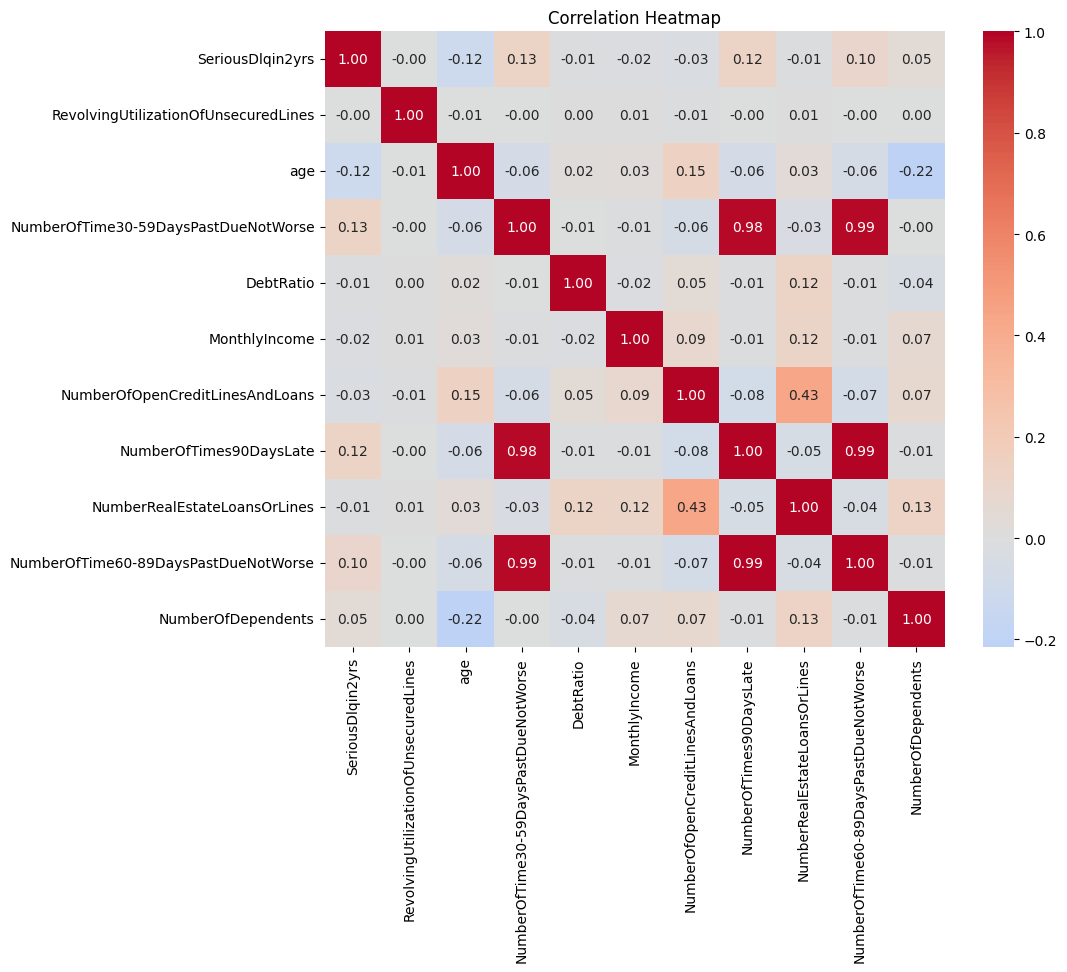

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046869
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.017151
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

In [6]:
plt.figure(figsize=(10, 8))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Show top correlations with SeriousDlqin2yrs
corr['SeriousDlqin2yrs'].sort_values(ascending=False)

# Monthly Income Bins vs. Revolving Utilization of Unsecured Lines
Visualize the distribution of RevolvingUtilizationOfUnsecuredLines across different MonthlyIncome bins.

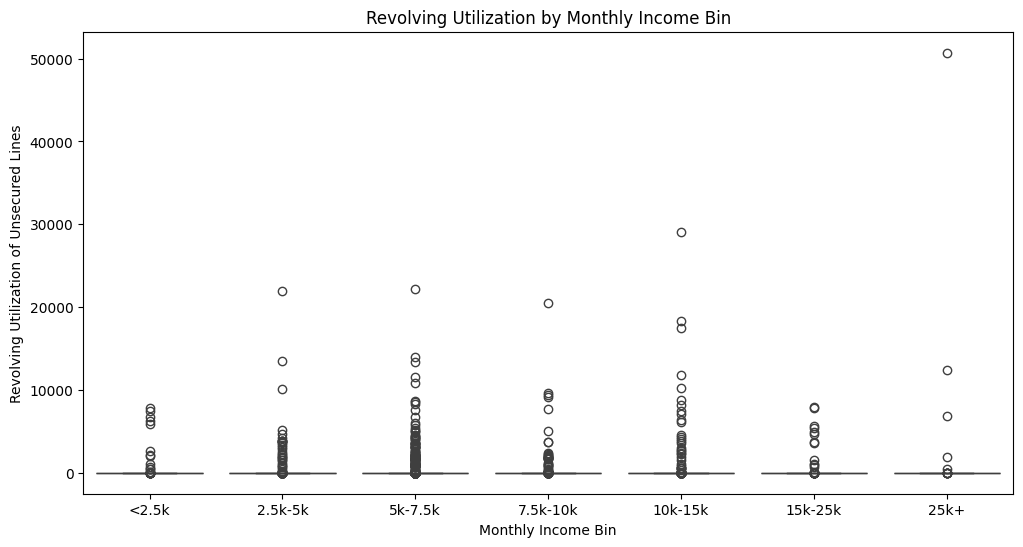

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='IncomeBin', y='RevolvingUtilizationOfUnsecuredLines', data=train_df)
plt.xlabel('Monthly Income Bin')
plt.ylabel('Revolving Utilization of Unsecured Lines')
plt.title('Revolving Utilization by Monthly Income Bin')
plt.show()

# Age vs. Monthly Income
Scatter plot to visualize the relationship between age and monthly income.

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\481666998.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train_df.pivot_table(index='AgeBin', columns='IncomeBin', values='MonthlyIncome', aggfunc='count', fill_value=0)


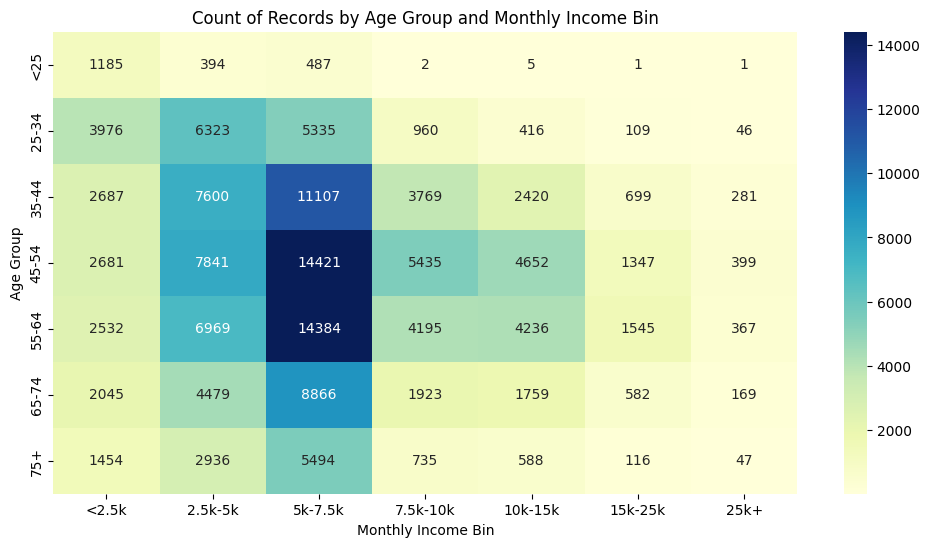

In [12]:
# Bin ages and monthly income for a clearer plot
age_bins = [0, 25, 35, 45, 55, 65, 75, np.inf]
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
train_df['AgeBin'] = pd.cut(train_df['age'], bins=age_bins, labels=age_labels, right=False)

income_bins = [0, 2500, 5000, 7500, 10000, 15000, 25000, np.inf]
income_labels = ['<2.5k', '2.5k-5k', '5k-7.5k', '7.5k-10k', '10k-15k', '15k-25k', '25k+']
train_df['IncomeBin'] = pd.cut(train_df['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

# Create a pivot table for counts
pivot = train_df.pivot_table(index='AgeBin', columns='IncomeBin', values='MonthlyIncome', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Monthly Income Bin')
plt.ylabel('Age Group')
plt.title('Count of Records by Age Group and Monthly Income Bin')
plt.show()

# Age Binning and Classification Plot
Bin the ages and plot the average number of 30-59 days past due delinquency for each age group.

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1033178248.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_age_binned.groupby('AgeBin')['NumberOfTime30-59DaysPastDueNotWorse'].mean().reset_index()
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1033178248.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeBin', y='NumberOfTime30-59DaysPastDueNotWorse', data=grouped, palette='viridis')


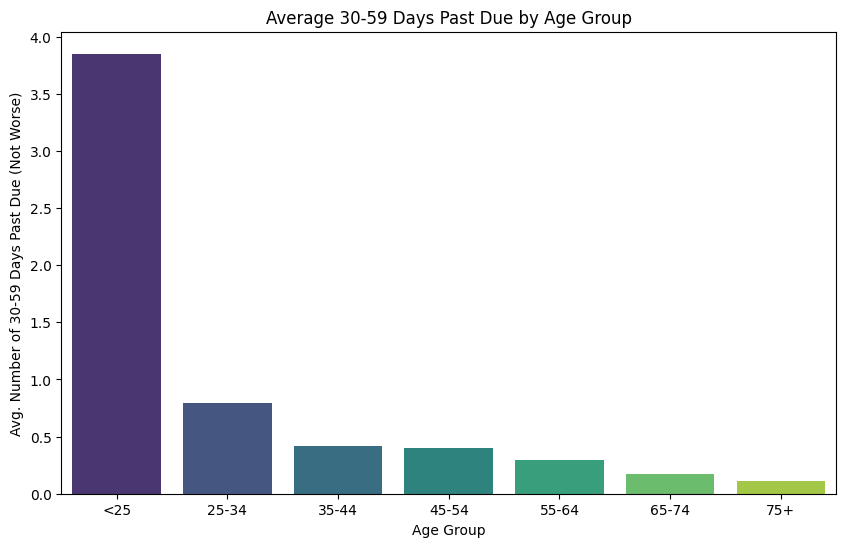

In [11]:
# Define age bins and labels
age_bins = [0, 25, 35, 45, 55, 65, 75, np.inf]
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Create a new column for binned age
df_age_binned = train_df.copy()
df_age_binned['AgeBin'] = pd.cut(df_age_binned['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate mean delinquency for each age bin
grouped = df_age_binned.groupby('AgeBin')['NumberOfTime30-59DaysPastDueNotWorse'].mean().reset_index()

# Classification plot (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeBin', y='NumberOfTime30-59DaysPastDueNotWorse', data=grouped, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Avg. Number of 30-59 Days Past Due (Not Worse)')
plt.title('Average 30-59 Days Past Due by Age Group')
plt.show()

# Remove Heavy Outliers
Identify and remove heavy outliers from key numerical features to prevent overfitting.

In [13]:
# Define features to check for outliers
features = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]

# Remove outliers using the IQR method for each feature
for feature in features:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df = train_df[(train_df[feature] >= lower_bound) & (train_df[feature] <= upper_bound)]

# Show the new shape of the dataset
train_df.shape

(78953, 13)

# Binned Age vs. Probability of Serious Delinquency (SeriousDlqin2yrs)
Visualize the average probability of serious delinquency for each age group.

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\3040907311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_serious = train_df.groupby('AgeBin')['SeriousDlqin2yrs'].mean().reset_index()
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\3040907311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeBin', y='SeriousDlqin2yrs', data=grouped_serious, palette='rocket')


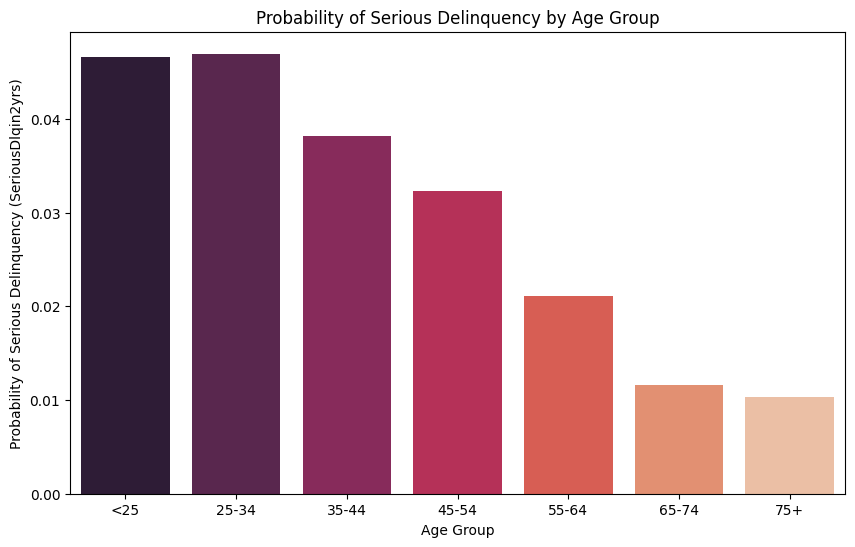

In [15]:
# Calculate mean probability of serious delinquency for each age bin
grouped_serious = train_df.groupby('AgeBin')['SeriousDlqin2yrs'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeBin', y='SeriousDlqin2yrs', data=grouped_serious, palette='rocket')
plt.xlabel('Age Group')
plt.ylabel('Probability of Serious Delinquency (SeriousDlqin2yrs)')
plt.title('Probability of Serious Delinquency by Age Group')
plt.show()

# Feature Engineering: Real Estate Loans and Open Credit Lines
Create features to analyze the relationship between loan types and serious delinquency.

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1757318340.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HasRealEstateLoan', y='SeriousDlqin2yrs', data=real_estate_group, ax=axes[0], palette='Blues')
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1757318340.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No Real Estate Loan', 'Has Real Estate Loan'])
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1757318340.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HasManyOpenLoans', y='SeriousDlqin2yrs', data=open_loans_group, ax=axes[1], palette='Greens')
C:\U

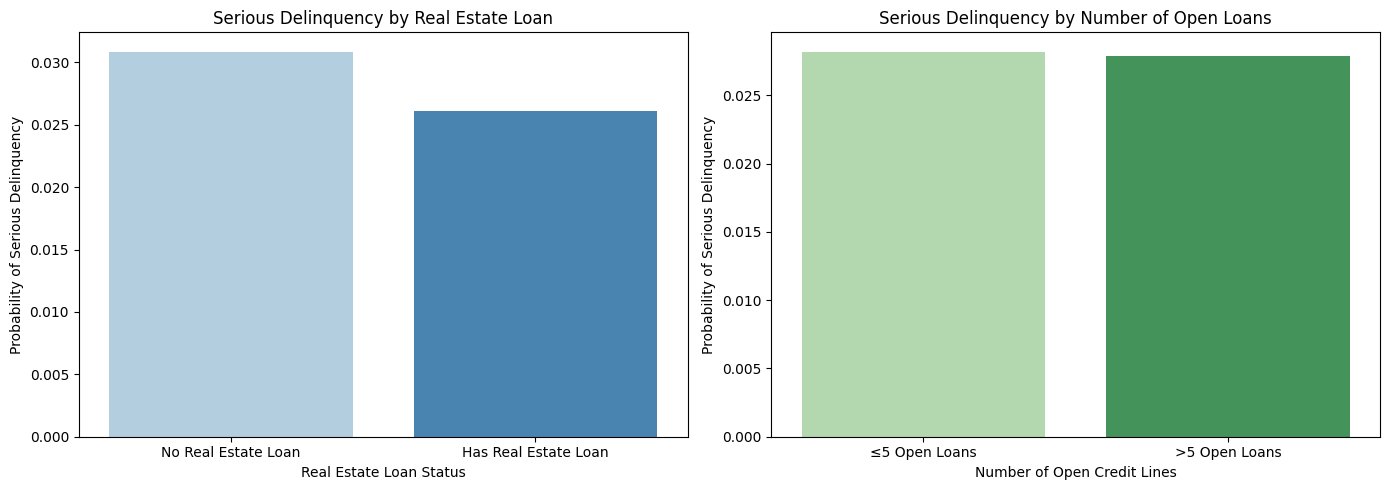

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1757318340.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HasBoth', y='SeriousDlqin2yrs', data=both_group, palette='Purples')


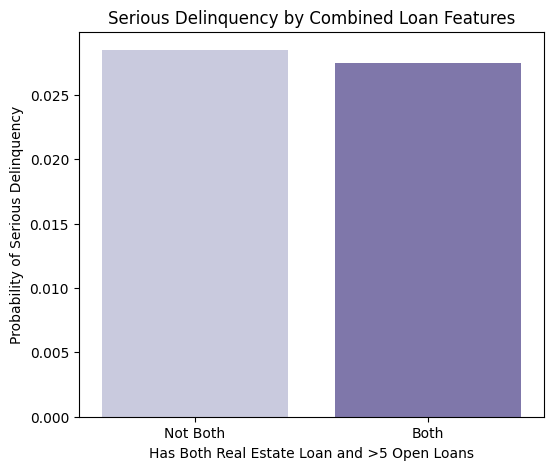

In [16]:
# Create binary features for having real estate loans and many open credit lines
train_df['HasRealEstateLoan'] = (train_df['NumberRealEstateLoansOrLines'] > 0).astype(int)
train_df['HasManyOpenLoans'] = (train_df['NumberOfOpenCreditLinesAndLoans'] > 5).astype(int)

# Group by these features and calculate mean probability of serious delinquency
real_estate_group = train_df.groupby('HasRealEstateLoan')['SeriousDlqin2yrs'].mean().reset_index()
open_loans_group = train_df.groupby('HasManyOpenLoans')['SeriousDlqin2yrs'].mean().reset_index()

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x='HasRealEstateLoan', y='SeriousDlqin2yrs', data=real_estate_group, ax=axes[0], palette='Blues')
axes[0].set_xticklabels(['No Real Estate Loan', 'Has Real Estate Loan'])
axes[0].set_ylabel('Probability of Serious Delinquency')
axes[0].set_xlabel('Real Estate Loan Status')
axes[0].set_title('Serious Delinquency by Real Estate Loan')

sns.barplot(x='HasManyOpenLoans', y='SeriousDlqin2yrs', data=open_loans_group, ax=axes[1], palette='Greens')
axes[1].set_xticklabels(['≤5 Open Loans', '>5 Open Loans'])
axes[1].set_ylabel('Probability of Serious Delinquency')
axes[1].set_xlabel('Number of Open Credit Lines')
axes[1].set_title('Serious Delinquency by Number of Open Loans')

plt.tight_layout()
plt.show()

# Cross-feature: Both real estate loan and many open loans
train_df['HasBoth'] = ((train_df['HasRealEstateLoan'] == 1) & (train_df['HasManyOpenLoans'] == 1)).astype(int)
both_group = train_df.groupby('HasBoth')['SeriousDlqin2yrs'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='HasBoth', y='SeriousDlqin2yrs', data=both_group, palette='Purples')
plt.xticks([0, 1], ['Not Both', 'Both'])
plt.ylabel('Probability of Serious Delinquency')
plt.xlabel('Has Both Real Estate Loan and >5 Open Loans')
plt.title('Serious Delinquency by Combined Loan Features')
plt.show()

# Data Preprocessing for Model Training
Prepare the dataset for classification model training.

In [18]:
# Select features for training (excluding target and binned/categorical columns)
features = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents',
    'HasRealEstateLoan',
    'HasManyOpenLoans',
    'HasBoth'
]

# Define X and y
X = train_df[features]
y = train_df['SeriousDlqin2yrs']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Show the shape of the resulting sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((63162, 13), (15791, 13), (63162,), (15791,))

# Train Classification Models and Visualize Top 5 Features
Train Logistic Regression, KNN, Random Forest, and Decision Tree models. Extract and plot the 5 most important features from each.

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\4054400689.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f[0] for f in logreg_top_features], rotation=45, ha='right')
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\4054400689.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f[0] for f in rf_top_features], rotation=45, ha='right')
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\4054400689.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels([f[0] for f in dt_top_features], rotation=45, ha='right')


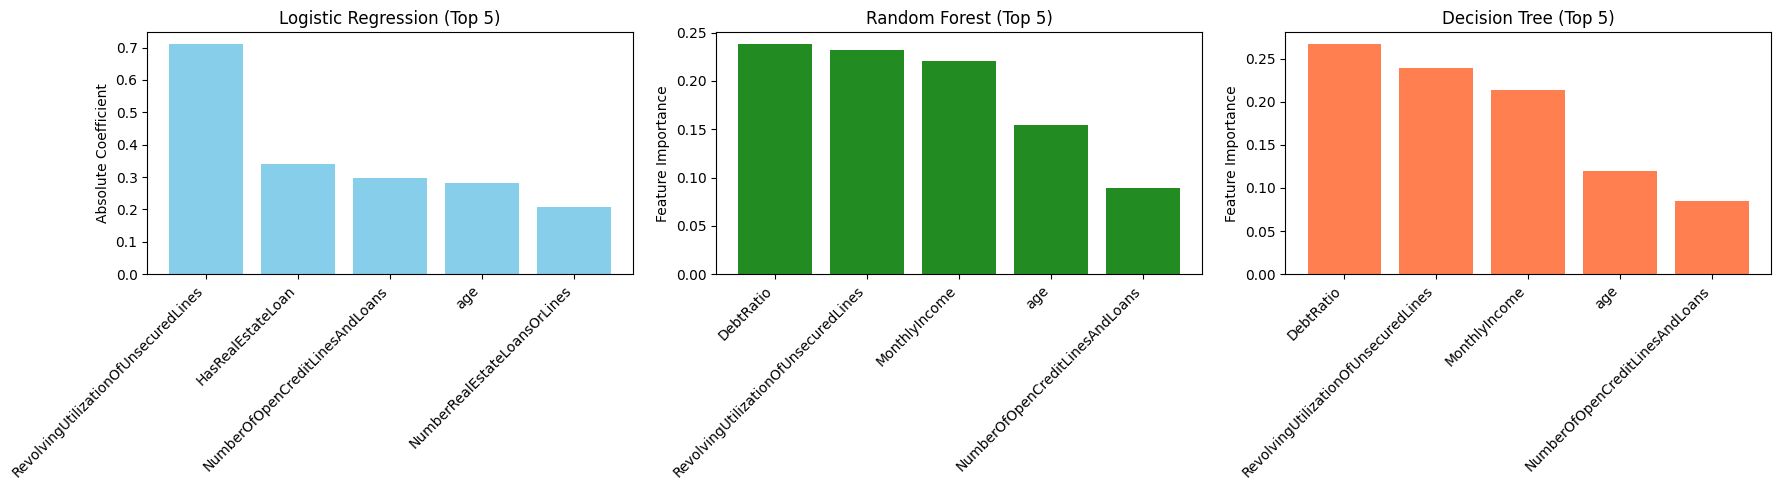

In [19]:
# Train models
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature names
feature_names = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents',
    'HasRealEstateLoan',
    'HasManyOpenLoans',
    'HasBoth'
]

# Extract top 5 features for each model
logreg_importance = np.abs(logreg.coef_[0])
logreg_top_idx = np.argsort(logreg_importance)[-5:][::-1]
logreg_top_features = [(feature_names[i], logreg_importance[i]) for i in logreg_top_idx]

# KNN does not provide feature importances, so we skip it for this plot

rf_importance = rf.feature_importances_
rf_top_idx = np.argsort(rf_importance)[-5:][::-1]
rf_top_features = [(feature_names[i], rf_importance[i]) for i in rf_top_idx]

dt_importance = dt.feature_importances_
dt_top_idx = np.argsort(dt_importance)[-5:][::-1]
dt_top_features = [(feature_names[i], dt_importance[i]) for i in dt_top_idx]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
axes[0].bar([f[0] for f in logreg_top_features], [f[1] for f in logreg_top_features], color='skyblue')
axes[0].set_title('Logistic Regression (Top 5)')
axes[0].set_ylabel('Absolute Coefficient')
axes[0].set_xticklabels([f[0] for f in logreg_top_features], rotation=45, ha='right')

# Random Forest
axes[1].bar([f[0] for f in rf_top_features], [f[1] for f in rf_top_features], color='forestgreen')
axes[1].set_title('Random Forest (Top 5)')
axes[1].set_ylabel('Feature Importance')
axes[1].set_xticklabels([f[0] for f in rf_top_features], rotation=45, ha='right')

# Decision Tree
axes[2].bar([f[0] for f in dt_top_features], [f[1] for f in dt_top_features], color='coral')
axes[2].set_title('Decision Tree (Top 5)')
axes[2].set_ylabel('Feature Importance')
axes[2].set_xticklabels([f[0] for f in dt_top_features], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Evaluate Model Performance
Evaluate each model using accuracy, precision, recall, F1-score, and ROC-AUC on the validation set.

In [22]:
models = {
    'Logistic Regression': logreg,
    'KNN': knn,
    'Random Forest': rf,
    'Decision Tree': dt
}

for name, model in models.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_val, y_proba))
    print(classification_report(y_val, y_pred))


Logistic Regression:
Accuracy: 0.972009372427332
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.7598054201358498
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15349
           1       0.00      0.00      0.00       442

    accuracy                           0.97     15791
   macro avg       0.49      0.50      0.49     15791
weighted avg       0.94      0.97      0.96     15791



C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: P


KNN:
Accuracy: 0.9708694826166804
Precision: 0.05
Recall: 0.0022624434389140274
F1 Score: 0.00432900432900433
ROC-AUC: 0.5503853184828761
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15349
           1       0.05      0.00      0.00       442

    accuracy                           0.97     15791
   macro avg       0.51      0.50      0.49     15791
weighted avg       0.95      0.97      0.96     15791


Random Forest:
Accuracy: 0.9718827180039263
Precision: 0.3333333333333333
Recall: 0.004524886877828055
F1 Score: 0.00892857142857143
ROC-AUC: 0.7084962718104176
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15349
           1       0.33      0.00      0.01       442

    accuracy                           0.97     15791
   macro avg       0.65      0.50      0.50     15791
weighted avg       0.95      0.97      0.96     15791


Decision Tree:
Accuracy: 0.9421822557152808


# Prepare Test Data and Create Submission
Load the test data, preprocess it, apply the trained models, and create a submission file using the format of sampleEntry.csv.

In [24]:
# Load test data
cs_test = pd.read_csv('cs-test.csv', index_col=0)

# Fill missing values as done for training data
cs_test['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
cs_test['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)
# Do NOT drop rows in test set to preserve row count for submission
# cs_test.dropna(inplace=True)

# Feature engineering for test data
cs_test['HasRealEstateLoan'] = (cs_test['NumberRealEstateLoansOrLines'] > 0).astype(int)
cs_test['HasManyOpenLoans'] = (cs_test['NumberOfOpenCreditLinesAndLoans'] > 5).astype(int)
cs_test['HasBoth'] = ((cs_test['HasRealEstateLoan'] == 1) & (cs_test['HasManyOpenLoans'] == 1)).astype(int)

# Select features and scale
X_test = cs_test[features]
X_test_scaled = scaler.transform(X_test)

# Use the best model (Random Forest) for submission (can be changed as needed)
test_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Prepare submission DataFrame
sample_entry = pd.read_csv('sampleEntry.csv')
submission = sample_entry.copy()
submission['Probability'] = test_proba[:len(submission)]

# Save submission file
submission.to_csv('submission.csv', index=False)
print('Submission file created: submission.csv')

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\3818848600.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cs_test['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\3818848600.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Submission file created: submission.csv


# Advanced Feature Engineering, Winsorization, and Model Tuning
Apply feature binning, winsorization, and hyperparameter tuning. Try XGBoost as well.

In [26]:
# Reload and preprocess the training data (to avoid data leakage from previous outlier removal)
train_df = pd.read_csv('cs-training.csv', index_col=0)
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)

# Feature engineering
train_df['HasRealEstateLoan'] = (train_df['NumberRealEstateLoansOrLines'] > 0).astype(int)
train_df['HasManyOpenLoans'] = (train_df['NumberOfOpenCreditLinesAndLoans'] > 5).astype(int)
train_df['HasBoth'] = ((train_df['HasRealEstateLoan'] == 1) & (train_df['HasManyOpenLoans'] == 1)).astype(int)

C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1056712128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1056712128.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 


Logistic Regression (weighted):
Accuracy: 0.8070666666666667
Precision: 0.2205643374205939
Recall: 0.7446384039900249
F1 Score: 0.3403236836106679
ROC-AUC: 0.8622422422244087
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.74      0.34      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.81      0.85     30000


Random Forest (tuned):
Accuracy: 0.9368333333333333
Precision: 0.6141078838174274
Recall: 0.14763092269326683
F1 Score: 0.2380377965420185
ROC-AUC: 0.8671944357716175
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.61      0.15      0.24      2005

    accuracy                           0.94     30000
   macro avg       0.78      0.57      0.60     30000
weighted avg       0.92      0.94      0.92     30000


D

C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1056712128.py:122: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cs_test['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
C:\Users\ashmi\AppData\Local\Package

Advanced submission file created: submission_xgb.csv


# Feature Binning and Winsorization
Bin the `NumberOfTimes90DaysLate` feature and winsorize (cap) extreme values for selected features.

In [27]:
def bin_late(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    else:
        return 2
train_df['Late90Bin'] = train_df['NumberOfTimes90DaysLate'].apply(bin_late)

cap_features = [
    'RevolvingUtilizationOfUnsecuredLines',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]
for col in cap_features:
    train_df[col] = mstats.winsorize(train_df[col], limits=[0.01, 0.01])

# Prepare Features and Split Data
Select features, scale them, and split into training and validation sets.

In [28]:
features_adv = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents',
    'HasRealEstateLoan',
    'HasManyOpenLoans',
    'HasBoth',
    'Late90Bin'
]
X = train_df[features_adv]
y = train_df['SeriousDlqin2yrs']

scaler_adv = StandardScaler()
X_scaled = scaler_adv.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Training and Hyperparameter Tuning
Train and tune Logistic Regression, Random Forest, Decision Tree, KNN, and XGBoost models.

In [29]:
# Class weights for Logistic Regression
cw = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: cw[i] for i in range(len(cw))}

# Logistic Regression with class weights
logreg_adv = LogisticRegression(max_iter=1000, class_weight=class_weights, random_state=42)
logreg_adv.fit(X_train, y_train)

# Random Forest with GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid={'n_estimators': [100, 200], 'max_depth': [5, 10, None]},
                      scoring='roc_auc', cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Decision Tree with GridSearchCV
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      param_grid={'max_depth': [3, 5, 10, None]},
                      scoring='roc_auc', cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

# KNN with GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),
                       param_grid={'n_neighbors': [3, 5, 7, 9]},
                       scoring='roc_auc', cv=3, n_jobs=-1)
grid_knn.fit(X_train, y_train)

# XGBoost with RandomizedSearchCV
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=5, scoring='roc_auc', cv=3, n_jobs=-1, random_state=42)
grid_xgb.fit(X_train, y_train)

C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:43:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='roc_auc')

# Evaluate Tuned Models
Evaluate all tuned models on the validation set using multiple metrics.

In [30]:
models_adv = {
    'Logistic Regression (weighted)': logreg_adv,
    'Random Forest (tuned)': grid_rf.best_estimator_,
    'Decision Tree (tuned)': grid_dt.best_estimator_,
    'KNN (tuned)': grid_knn.best_estimator_,
    'XGBoost (tuned)': grid_xgb.best_estimator_
}

for name, model in models_adv.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_val, y_proba))
    print(classification_report(y_val, y_pred))


Logistic Regression (weighted):
Accuracy: 0.8070666666666667
Precision: 0.2205643374205939
Recall: 0.7446384039900249
F1 Score: 0.3403236836106679
ROC-AUC: 0.8622422422244087
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.74      0.34      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.81      0.85     30000


Random Forest (tuned):
Accuracy: 0.9368333333333333
Precision: 0.6141078838174274
Recall: 0.14763092269326683
F1 Score: 0.2380377965420185
ROC-AUC: 0.8671944357716175
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.61      0.15      0.24      2005

    accuracy                           0.94     30000
   macro avg       0.78      0.57      0.60     30000
weighted avg       0.92      0.94      0.92     30000


D

# Prepare Test Data and Create Advanced Submission
Preprocess the test data, apply the best model (XGBoost), and create a new submission file.

In [31]:
cs_test = pd.read_csv('cs-test.csv', index_col=0)
cs_test['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
cs_test['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)
cs_test['HasRealEstateLoan'] = (cs_test['NumberRealEstateLoansOrLines'] > 0).astype(int)
cs_test['HasManyOpenLoans'] = (cs_test['NumberOfOpenCreditLinesAndLoans'] > 5).astype(int)
cs_test['HasBoth'] = ((cs_test['HasRealEstateLoan'] == 1) & (cs_test['HasManyOpenLoans'] == 1)).astype(int)
cs_test['Late90Bin'] = cs_test['NumberOfTimes90DaysLate'].apply(bin_late)
for col in cap_features:
    cs_test[col] = mstats.winsorize(cs_test[col], limits=[0.01, 0.01])
X_test_adv = cs_test[features_adv]
X_test_adv_scaled = scaler_adv.transform(X_test_adv)

test_proba_adv = grid_xgb.best_estimator_.predict_proba(X_test_adv_scaled)[:, 1]
sample_entry = pd.read_csv('sampleEntry.csv')
submission_adv = sample_entry.copy()
submission_adv['Probability'] = test_proba_adv[:len(submission_adv)]
submission_adv.to_csv('submission_xgb.csv', index=False)
print('Advanced submission file created: submission_xgb.csv')

C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\ashmi\AppData\Local\Temp\ipykernel_76348\1307100687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cs_test['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)
C:\Users\ashmi\AppData\Local\Packages\

Advanced submission file created: submission_xgb.csv
